D:\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8621 - loss: 0.2851 - val_accuracy: 0.9785 - val_loss: 0.0711
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9890 - loss: 0.0404 - val_accuracy: 0.9607 - val_loss: 0.1022
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9969 - loss: 0.0128 - val_accuracy: 0.9633 - val_loss: 0.1136
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9967 - loss: 0.0090 - val_accuracy: 0.9696 - val_loss: 0.1073
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9991 - loss: 0.0022 - val_accuracy: 0.9728 - val_loss: 0.1227
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9709 - val_loss: 0.1606
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9988 - loss: 0.0031 - val_accuracy: 0.9690 - val_loss: 0.1334
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9696 - v

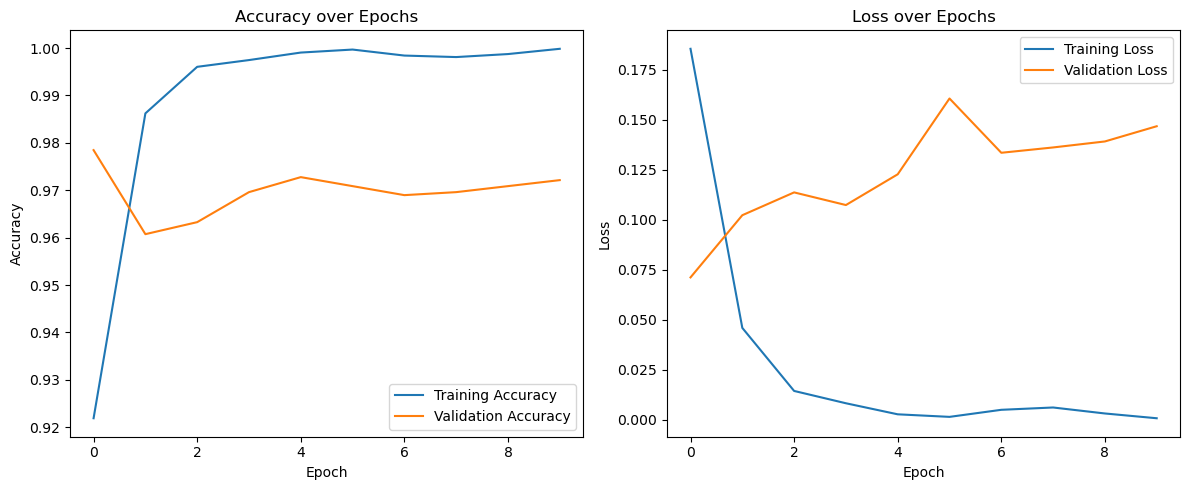

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# تحميل البيانات
d_tweets = pd.read_csv("C:\\Users\Kareem\\Downloads\\archive (5)\\clean_d_tweets.csv")
non_d_tweets = pd.read_csv("C:\\Users\\Kareem\Downloads\\archive (5)\\non_d_tweets.csv")

# إضافة العلامات
d_tweets['label'] = 1  # مكتئب
non_d_tweets['label'] = 0  # غير مكتئب

# دمج البيانات
data = pd.concat([d_tweets, non_d_tweets])

# معالجة القيم NaN في عمود 'tweet'
data['tweet'] = data['tweet'].fillna('')  # استبدال NaN بسلسلة فارغة

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.2, random_state=42)

# توكين النصوص
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_length = max([len(x) for x in X_train_seq])  # أطول جملة في التدريب
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# إنشاء نموذج LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

# تقييم النموذج
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# رسم مخطط الدقة
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# رسم مخطط الخسارة
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


D:\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.8543 - loss: 0.3108 - val_accuracy: 0.9645 - val_loss: 0.0930
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9863 - loss: 0.0433 - val_accuracy: 0.9696 - val_loss: 0.0923
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9965 - loss: 0.0116 - val_accuracy: 0.9664 - val_loss: 0.1241
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9740 - val_loss: 0.1139
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 0.9690 - val_loss: 0.1416
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.9709 - val_loss: 0.1136
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9702 - val_loss: 0.1309
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9740 - val_loss: 0

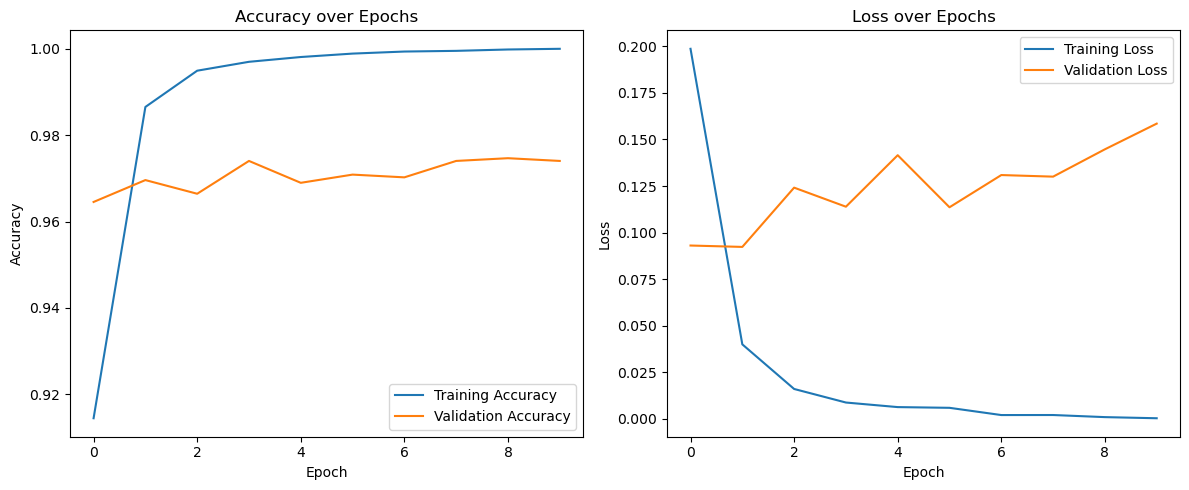

In [2]:
import numpy as np  # استيراد مكتبة numpy للعمليات الرياضية والمصفوفات
from sklearn.model_selection import train_test_split  # استيراد دالة تقسيم البيانات إلى تدريب واختبار
from tensorflow.keras.preprocessing.text import Tokenizer  # استيراد كائن Tokenizer لتحويل النصوص إلى تسلسلات رقمية
from tensorflow.keras.preprocessing.sequence import pad_sequences  # استيراد دالة لجعل جميع تسلسلات النصوص بنفس الطول
from tensorflow.keras.models import Sequential  # استيراد نموذج Sequential لبناء نماذج الشبكات العصبية بطريقة تسلسلية
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D  # استيراد طبقات مختلفة للنموذج
from tensorflow.keras.optimizers import Adam  # استيراد مُحسّن Adam لتحديث وزن الشبكة
import matplotlib.pyplot as plt  # استيراد مكتبة matplotlib لرسم الرسوم البيانية

# تحميل البيانات من ملفات CSV
d_tweets = pd.read_csv("C:\\Users\Kareem\\Downloads\\archive (5)\\clean_d_tweets.csv")
non_d_tweets = pd.read_csv("C:\\Users\\Kareem\Downloads\\archive (5)\\non_d_tweets.csv")

# إضافة علامة التصنيف لكل مجموعة من البيانات
d_tweets['label'] = 1  # مكتئب
non_d_tweets['label'] = 0  # غير مكتئب

# دمج البيانات المكتئبة وغير المكتئبة في مجموعة بيانات واحدة
data = pd.concat([d_tweets, non_d_tweets])

# معالجة القيم NaN في عمود 'tweet' بتحويلها إلى سلسلة نصية فارغة
data['tweet'] = data['tweet'].fillna('')

# تقسيم البيانات إلى مجموعات تدريب واختبار بنسبة 80% تدريب و20% اختبار
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.2, random_state=42)

# إنشاء كائن Tokenizer وتدريبه على نصوص التدريب لتحويلها إلى تسلسلات رقمية
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# تحويل النصوص إلى تسلسلات رقمية
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# تحديد أطول تسلسل لاستخدامه في جميع التسلسلات
max_length = max([len(x) for x in X_train_seq])

# جعل جميع التسلسلات بنفس الطول باستخدام Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# إنشاء نموذج الشبكة العصبية التسلسلي وإضافة طبقات مختلفة
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# تجميع النموذج مع تحديد الخسارة والمتريات والمحسن
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# تدريب النموذج على بيانات التدريب مع التحقق من الأداء على بيانات الاختبار
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

# تقييم النموذج وطباعة الدقة
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# إعداد ورسم مخططين للدقة والخسارة على مدى العصور التدريبية
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
